In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 781 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
import matplotlib.pyplot as plt


# Obtaining and Cleaning Data
The code in this section accesses each stock's historical data and cleans it. This includes selecting the desired data (closing prices), normalizes, and scaling the data. This is important for creating our training and testing data to help us build the model.

In [ ]:
# IMPORT THE LIBRARY
import yfinance as yf
from datetime import datetime

# CREATE TICKER INSTANCE FOR AMAZON
#Initialize API
amzn = yf.Ticker("AMZN")
#Make the end date the current day
end_date = datetime.now().strftime('%Y-%m-%d')
#Pull Stock Price History
amzn_hist = amzn.history(start='2017-01-01',end=end_date)
print(amzn_hist)

#WALMART
wmt = yf.Ticker("WMT")
wmt_hist = wmt.history(start='2017-01-01',end=end_date)
print(wmt_hist)

#TAIWAN SEMICONDUCTOR
tsm = yf.Ticker("TSM")
tsm_hist = tsm.history(start='2017-01-01',end=end_date)
print(tsm_hist)

#AMD
amd = yf.Ticker("AMD")
amd_hist = amd.history(start='2017-01-01',end=end_date)
print(amd_hist)

#TESLA
tsla = yf.Ticker("TSLA")
tsla_hist = tsla.history(start='2017-01-01',end=end_date)
print(tsla_hist)

#MCDONALDS
mcd = yf.Ticker("MCD")
mcd_hist = mcd.history(start='2017-01-01',end=end_date)
print(mcd_hist)

#PFIZER
pfe = yf.Ticker("PFE")
pfe_hist = pfe.history(start='2017-01-01',end=end_date)
print(pfe_hist)

#EXXON
xom = yf.Ticker("XOM")
xom_hist = xom.history(start='2017-01-01',end=end_date)
print(xom_hist)

#BITCOIN
btc = yf.Ticker("BTC-USD")
btc_hist = btc.history(start='2017-01-01',end=end_date)
print(btc_hist)

#AT&T
t = yf.Ticker("T")
t_hist = t.history(start='2017-01-01',end=end_date)
print(t_hist)


                                Open       High        Low      Close  \
Date                                                                    
2017-01-03 00:00:00-05:00  37.896000  37.938000  37.384998  37.683498   
2017-01-04 00:00:00-05:00  37.919498  37.984001  37.709999  37.859001   
2017-01-05 00:00:00-05:00  38.077499  39.119999  38.013000  39.022499   
2017-01-06 00:00:00-05:00  39.118000  39.972000  38.924000  39.799500   
2017-01-09 00:00:00-05:00  39.900002  40.088501  39.588501  39.846001   
...                              ...        ...        ...        ...   
2022-11-29 00:00:00-05:00  94.040001  94.410004  91.440002  92.419998   
2022-11-30 00:00:00-05:00  92.470001  96.540001  91.529999  96.540001   
2022-12-01 00:00:00-05:00  96.989998  97.230003  94.919998  95.500000   
2022-12-02 00:00:00-05:00  94.480003  95.360001  93.779999  94.129997   
2022-12-05 00:00:00-05:00  93.050003  94.059998  90.820000  91.010002   

                              Volume  Dividends  S

In [ ]:
#This code stores the closing prices of every stock we are looking at into seperate arrays
#The data goes back to 2017

amzn_close = amzn_hist['Close']
amzn_values = amzn_close.values
amzn_values = amzn_values.reshape(-1,1)

wmt_close = wmt_hist['Close']
wmt_values = wmt_close.values
wmt_values = wmt_values.reshape(-1,1)

tsm_close = tsm_hist['Close']
tsm_values = tsm_close.values
tsm_values = tsm_values.reshape(-1,1)

amd_close = amd_hist['Close']
amd_values = amd_close.values
amd_values = amd_values.reshape(-1,1)

tsla_close = tsla_hist['Close']
tsla_values = tsla_close.values
tsla_values = tsla_values.reshape(-1,1)

mcd_close = mcd_hist['Close']
mcd_values = mcd_close.values
mcd_values = mcd_values.reshape(-1,1)

pfe_close = pfe_hist['Close']
pfe_values = pfe_close.values
pfe_values = pfe_values.reshape(-1,1)

xom_close = xom_hist['Close']
xom_values = xom_close.values
xom_values = xom_values.reshape(-1,1)

btc_close = btc_hist['Close']
btc_values = btc_close.values
btc_values = btc_values.reshape(-1,1)

t_close = t_hist['Close']
t_values = t_close.values
t_values = t_values.reshape(-1,1)


In [ ]:
#SCALING THE DATA

trainingScaler = MinMaxScaler(feature_range=(0,1))

amzn_values_scaled = trainingScaler.fit_transform(amzn_values)
print(len(amzn_values_scaled))

wmt_values_scaled = trainingScaler.fit_transform(wmt_values)
print(len(wmt_values_scaled))

tsm_values_scaled = trainingScaler.fit_transform(tsm_values)
print(len(tsm_values_scaled))

amd_values_scaled = trainingScaler.fit_transform(amd_values)
print(len(amd_values_scaled))

tsla_values_scaled = trainingScaler.fit_transform(tsla_values)
print(len(tsla_values_scaled))

mcd_values_scaled = trainingScaler.fit_transform(mcd_values)
print(len(mcd_values_scaled))

pfe_values_scaled = trainingScaler.fit_transform(pfe_values)
print(len(pfe_values_scaled))

xom_values_scaled = trainingScaler.fit_transform(xom_values)
print(len(xom_values_scaled))

btc_values_scaled = trainingScaler.fit_transform(btc_values)
print(len(btc_values_scaled))

t_values_scaled = trainingScaler.fit_transform(t_values)
print(len(t_values_scaled))

1492
1492
1492
1492
1492
1492
1492
1492
2165
1492


# Creating the Training Data
This section contains code that divides the data in preparation for training and prepares for predictions.

In [ ]:
#CREATING TRAINING DATASETS

#85:15 split train to test
training_split = math.floor(len(amzn_values_scaled) * 0.85) #1267+

training_split_btc = math.floor(len(btc_values_scaled) * 0.85)


training_amzn = amzn_values_scaled[0:training_split]
training_wmt = wmt_values_scaled[0:training_split]
training_tsm = tsm_values_scaled[0:training_split]
training_amd = amd_values_scaled[0:training_split]
training_tsla = tsla_values_scaled[0:training_split]
training_mcd = mcd_values_scaled[0:training_split]
training_pfe = pfe_values_scaled[0:training_split]
training_xom = xom_values_scaled[0:training_split]
training_btc = btc_values_scaled[0:training_split_btc]
training_t = t_values_scaled[0:training_split]

training_ind_amzn = []
training_ind_wmt = []
training_ind_tsm = []
training_ind_amd = []
training_ind_tsla = []
training_ind_mcd = []
training_ind_pfe = []
training_ind_xom = []
training_ind_btc = []
training_ind_t = []


training_dep_amzn = []
training_dep_wmt = []
training_dep_tsm = []
training_dep_amd = []
training_dep_tsla = []
training_dep_mcd = []
training_dep_pfe = []
training_dep_xom = []
training_dep_btc = []
training_dep_t = []


#Preparing Training Data

#Amazon
for i in range(50, len(training_amzn)):
  training_ind_amzn.append(training_amzn[i-50:i][0])
  training_dep_amzn.append(training_amzn[i][0])

#Walmart
for i in range(50, len(training_wmt)):
  training_ind_wmt.append(wmt_values_scaled[i-50:i][0])
  training_dep_wmt.append(wmt_values_scaled[i][0])

#Taiwan Semiconductor
for i in range(50, len(training_tsm)):
  training_ind_tsm.append(tsm_values_scaled[i-50:i][0])
  training_dep_tsm.append(tsm_values_scaled[i][0])

#Advanced Micro Devices
for i in range(50, len(training_amd)):
  training_ind_amd.append(amd_values_scaled[i-50:i][0])
  training_dep_amd.append(amd_values_scaled[i][0])

#Tesla 
for i in range(50, len(training_tsla)):
  training_ind_tsla.append(tsla_values_scaled[i-50:i][0])
  training_dep_tsla.append(tsla_values_scaled[i][0])

#McDonalds
for i in range(50, len(training_mcd)):
  training_ind_mcd.append(mcd_values_scaled[i-50:i][0])
  training_dep_mcd.append(mcd_values_scaled[i][0])

#Pfizer
for i in range(50, len(training_pfe)):
  training_ind_pfe.append(pfe_values_scaled[i-50:i][0])
  training_dep_pfe.append(pfe_values_scaled[i][0])

#Exxon
for i in range(50, len(training_xom)):
  training_ind_xom.append(xom_values_scaled[i-50:i][0])
  training_dep_xom.append(xom_values_scaled[i][0])

#Bitcoin
for i in range(50, len(training_btc)):
  training_ind_btc.append(btc_values_scaled[i-50:i][0])
  training_dep_btc.append(btc_values_scaled[i][0])

for i in range(50, len(training_t)):
  training_ind_t.append(t_values_scaled[i-50:i][0])
  training_dep_t.append(t_values_scaled[i][0])

training_ind_amzn, training_dep_amzn = np.array(training_ind_amzn), np.array(training_dep_amzn)
training_ind_amzn = np.reshape(training_ind_amzn, (training_ind_amzn.shape[0], training_ind_amzn.shape[1], 1))

training_ind_wmt, training_dep_wmt = np.array(training_ind_wmt), np.array(training_dep_wmt)
training_ind_wmt = np.reshape(training_ind_wmt, (training_ind_wmt.shape[0], training_ind_wmt.shape[1], 1))

training_ind_tsm, training_dep_tsm = np.array(training_ind_tsm), np.array(training_dep_tsm)
training_ind_tsm = np.reshape(training_ind_tsm, (training_ind_tsm.shape[0], training_ind_tsm.shape[1], 1))

training_ind_amd, training_dep_amd = np.array(training_ind_amd), np.array(training_dep_amd)
training_ind_amd = np.reshape(training_ind_amd, (training_ind_amd.shape[0], training_ind_amd.shape[1], 1))

training_ind_tsla, training_dep_tsla = np.array(training_ind_tsla), np.array(training_dep_tsla)
training_ind_tsla = np.reshape(training_ind_tsla, (training_ind_tsla.shape[0], training_ind_tsla.shape[1], 1))

training_ind_mcd, training_dep_mcd = np.array(training_ind_mcd), np.array(training_dep_mcd)
training_ind_mcd = np.reshape(training_ind_mcd, (training_ind_mcd.shape[0], training_ind_mcd.shape[1], 1))

training_ind_pfe, training_dep_pfe = np.array(training_ind_pfe), np.array(training_dep_pfe)
training_ind_pfe = np.reshape(training_ind_pfe, (training_ind_pfe.shape[0], training_ind_pfe.shape[1], 1))

training_ind_xom, training_dep_xom = np.array(training_ind_xom), np.array(training_dep_xom)
training_ind_xom = np.reshape(training_ind_xom, (training_ind_xom.shape[0], training_ind_xom.shape[1], 1))

training_ind_btc, training_dep_btc = np.array(training_ind_btc), np.array(training_dep_btc)
training_ind_btc = np.reshape(training_ind_btc, (training_ind_btc.shape[0], training_ind_btc.shape[1], 1))

training_ind_t, training_dep_t = np.array(training_ind_t), np.array(training_dep_t)
training_ind_t = np.reshape(training_ind_t, (training_ind_t.shape[0], training_ind_t.shape[1], 1))


1268
1840
1218


# Network Architecture
This section contains the layers composing LSTM's architecture.

In [ ]:
# AMZN model
amzn_model = Sequential()
amzn_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_amzn.shape[1], 1)))
amzn_model.add(Dropout(0.2))
amzn_model.add(LSTM(100, return_sequences=True))
amzn_model.add(Dropout(0.2))
amzn_model.add(LSTM(100))
amzn_model.add(Dropout(0.2))
amzn_model.add(Dense(25))
amzn_model.add(Dense(1))
amzn_model.compile(optimizer='adam',loss='mean_squared_error')
amzn_model.fit(training_ind_amzn, training_dep_amzn, epochs = 60, batch_size = 32)

# WMT model
wmt_model = Sequential()
wmt_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_wmt.shape[1], 1)))
wmt_model.add(Dropout(0.2))
wmt_model.add(LSTM(100, return_sequences=True))
wmt_model.add(Dropout(0.2))
wmt_model.add(LSTM(100))
wmt_model.add(Dropout(0.2))
wmt_model.add(Dense(25))
wmt_model.add(Dense(1))
wmt_model.compile(optimizer='adam',loss='mean_squared_error')
wmt_model.fit(training_ind_wmt, training_dep_wmt, epochs = 60, batch_size = 32)

# TSM model
tsm_model = Sequential()
tsm_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_tsm.shape[1], 1)))
tsm_model.add(Dropout(0.2))
tsm_model.add(LSTM(100, return_sequences=True))
tsm_model.add(Dropout(0.2))
tsm_model.add(LSTM(100))
tsm_model.add(Dropout(0.2))
tsm_model.add(Dense(25))
tsm_model.add(Dense(1))
tsm_model.compile(optimizer='adam',loss='mean_squared_error')
tsm_model.fit(training_ind_tsm, training_dep_tsm, epochs = 60, batch_size = 32)

# AMD model
amd_model = Sequential()
amd_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_amd.shape[1], 1)))
amd_model.add(Dropout(0.2))
amd_model.add(LSTM(100, return_sequences=True))
amd_model.add(Dropout(0.2))
amd_model.add(LSTM(100))
amd_model.add(Dropout(0.2))
amd_model.add(Dense(25))
amd_model.add(Dense(1))
amd_model.compile(optimizer='adam',loss='mean_squared_error')
amd_model.fit(training_ind_amd, training_dep_amd, epochs = 60, batch_size = 32)

# TSLA model
tsla_model = Sequential()
tsla_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_tsla.shape[1], 1)))
tsla_model.add(Dropout(0.2))
tsla_model.add(LSTM(100, return_sequences=True))
tsla_model.add(Dropout(0.2))
tsla_model.add(LSTM(100))
tsla_model.add(Dropout(0.2))
tsla_model.add(Dense(25))
tsla_model.add(Dense(1))
tsla_model.compile(optimizer='adam',loss='mean_squared_error')
tsla_model.fit(training_ind_tsla, training_dep_tsla, epochs = 60, batch_size = 32)

# MCD model
mcd_model = Sequential()
mcd_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_mcd.shape[1], 1)))
mcd_model.add(Dropout(0.2))
mcd_model.add(LSTM(100, return_sequences=True))
mcd_model.add(Dropout(0.2))
mcd_model.add(LSTM(100))
mcd_model.add(Dropout(0.2))
mcd_model.add(Dense(25))
mcd_model.add(Dense(1))
mcd_model.compile(optimizer='adam',loss='mean_squared_error')
mcd_model.fit(training_ind_mcd, training_dep_mcd, epochs = 60, batch_size = 32)

# PFE model
pfe_model = Sequential()
pfe_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_pfe.shape[1], 1)))
pfe_model.add(Dropout(0.2))
pfe_model.add(LSTM(100, return_sequences=True))
pfe_model.add(Dropout(0.2))
pfe_model.add(LSTM(100))
pfe_model.add(Dropout(0.2))
pfe_model.add(Dense(25))
pfe_model.add(Dense(1))
pfe_model.compile(optimizer='adam',loss='mean_squared_error')
pfe_model.fit(training_ind_pfe, training_dep_pfe, epochs = 60, batch_size = 32)

# XOM model
xom_model = Sequential()
xom_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_xom.shape[1], 1)))
xom_model.add(Dropout(0.2))
xom_model.add(LSTM(100, return_sequences=True))
xom_model.add(Dropout(0.2))
xom_model.add(LSTM(100))
xom_model.add(Dropout(0.2))
xom_model.add(Dense(25))
xom_model.add(Dense(1))
xom_model.compile(optimizer='adam',loss='mean_squared_error')
xom_model.fit(training_ind_xom, training_dep_xom, epochs = 60, batch_size = 32)

# BTC model
btc_model = Sequential()
btc_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_btc.shape[1], 1)))
btc_model.add(Dropout(0.2))
btc_model.add(LSTM(100, return_sequences=True))
btc_model.add(Dropout(0.2))
btc_model.add(LSTM(100))
btc_model.add(Dropout(0.2))
btc_model.add(Dense(25))
btc_model.add(Dense(1))
btc_model.compile(optimizer='adam',loss='mean_squared_error')
btc_model.fit(training_ind_btc, training_dep_btc, epochs = 60, batch_size = 32)

# T model
t_model = Sequential()
t_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_t.shape[1], 1)))
t_model.add(Dropout(0.2))
t_model.add(LSTM(100, return_sequences=True))
t_model.add(Dropout(0.2))
t_model.add(LSTM(100))
t_model.add(Dropout(0.2))
t_model.add(Dense(25))
t_model.add(Dense(1))
t_model.compile(optimizer='adam',loss='mean_squared_error')
t_model.fit(training_ind_t, training_dep_t, epochs = 60, batch_size = 32)

Epoch 1/60
39/39 [==============================] - 10s 14ms/step - loss: 0.1167
Epoch 2/60
39/39 [==============================] - 0s 11ms/step - loss: 0.0240
Epoch 3/60
39/39 [==============================] - 0s 11ms/step - loss: 0.0086
Epoch 4/60
39/39 [==============================] - 1s 13ms/step - loss: 0.0085
Epoch 5/60
39/39 [==============================] - 0s 11ms/step - loss: 0.0076
Epoch 6/60
39/39 [==============================] - 0s 12ms/step - loss: 0.0075
Epoch 7/60
39/39 [==============================] - 1s 14ms/step - loss: 0.0072
Epoch 8/60
39/39 [==============================] - 0s 12ms/step - loss: 0.0077
Epoch 9/60
39/39 [==============================] - 0s 11ms/step - loss: 0.0072
Epoch 10/60
39/39 [==============================] - 0s 12ms/step - loss: 0.0068
Epoch 11/60
39/39 [==============================] - 1s 13ms/step - loss: 0.0070
Epoch 12/60
39/39 [==============================] - 0s 12ms/step - loss: 0.0066
Epoch 13/60
39/39 [=================

# Testing and Evaluating the Model
This section takes makes predictions and learns using the testing data. The predictions are then visualized.

In [ ]:
#TESTING DATASET PREPARATION
# AMZN
testing_input_amzn = amzn_values[training_split:]
testing_input_amzn = trainingScaler.fit_transform(testing_input_amzn)
testing_amzn = []
for i in range(50, len(testing_input_amzn) + 50):
  testing_amzn.append(testing_input_amzn[i-50:i][0])
testing_amzn = np.array(testing_amzn)
testing_amzn = np.reshape(testing_amzn, (testing_amzn.shape[0], testing_amzn.shape[1], 1))
predict_amzn = amzn_model.predict(testing_amzn)
predict_amzn = trainingScaler.inverse_transform(predict_amzn)

# WMT
testing_input_wmt = wmt_values[training_split:]
testing_input_wmt = trainingScaler.fit_transform(testing_input_wmt)
testing_wmt = []
for i in range(50, len(testing_input_wmt) + 50):
  testing_wmt.append(testing_input_wmt[i-50:i][0])
testing_wmt = np.array(testing_wmt)
testing_wmt = np.reshape(testing_wmt, (testing_wmt.shape[0], testing_wmt.shape[1], 1))
predict_wmt = wmt_model.predict(testing_wmt)
predict_wmt = trainingScaler.inverse_transform(predict_wmt)

# TSM
testing_input_tsm = tsm_values[training_split:]
testing_input_tsm = trainingScaler.fit_transform(testing_input_tsm)
testing_tsm = []
for i in range(50, len(testing_input_tsm) + 50):
  testing_tsm.append(testing_input_tsm[i-50:i][0])
testing_tsm = np.array(testing_tsm)
testing_tsm = np.reshape(testing_tsm, (testing_tsm.shape[0], testing_tsm.shape[1], 1))
predict_tsm = tsm_model.predict(testing_tsm)
predict_tsm = trainingScaler.inverse_transform(predict_tsm)

# AMD
testing_input_amd = amd_values[training_split:]
testing_input_amd = trainingScaler.fit_transform(testing_input_amd)
testing_amd = []
for i in range(50, len(testing_input_amd) + 50):
  testing_amd.append(testing_input_amd[i-50:i][0])
testing_amd = np.array(testing_amd)
testing_amd = np.reshape(testing_amd, (testing_amd.shape[0], testing_amd.shape[1], 1))
predict_amd = amd_model.predict(testing_amd)
predict_amd = trainingScaler.inverse_transform(predict_amd)

# TSLA
testing_input_tsla = tsla_values[training_split:]
testing_input_tsla = trainingScaler.fit_transform(testing_input_tsla)
testing_tsla = []
for i in range(50, len(testing_input_tsla) + 50):
  testing_tsla.append(testing_input_tsla[i-50:i][0])
testing_tsla = np.array(testing_tsla)
testing_tsla = np.reshape(testing_tsla, (testing_tsla.shape[0], testing_tsla.shape[1], 1))
predict_tsla = tsla_model.predict(testing_tsla)
predict_tsla = trainingScaler.inverse_transform(predict_tsla)

# MCD
testing_input_mcd = mcd_values[training_split:]
testing_input_mcd = trainingScaler.fit_transform(testing_input_mcd)
testing_mcd = []
for i in range(50, len(testing_input_mcd) + 50):
  testing_mcd.append(testing_input_mcd[i-50:i][0])
testing_mcd = np.array(testing_mcd)
testing_mcd = np.reshape(testing_mcd, (testing_mcd.shape[0], testing_mcd.shape[1], 1))
predict_mcd = mcd_model.predict(testing_mcd)
predict_mcd = trainingScaler.inverse_transform(predict_mcd)

# PFE
testing_input_pfe = pfe_values[training_split:]
testing_input_pfe = trainingScaler.fit_transform(testing_input_pfe)
testing_pfe = []
for i in range(50, len(testing_input_pfe) + 50):
  testing_pfe.append(testing_input_pfe[i-50:i][0])
testing_pfe = np.array(testing_pfe)
testing_pfe = np.reshape(testing_pfe, (testing_pfe.shape[0], testing_pfe.shape[1], 1))
predict_pfe = pfe_model.predict(testing_pfe)
predict_pfe = trainingScaler.inverse_transform(predict_pfe)

# XOM
testing_input_xom = xom_values[training_split:]
testing_input_xom = trainingScaler.fit_transform(testing_input_xom)
testing_xom = []
for i in range(50, len(testing_input_xom) + 50):
  testing_xom.append(testing_input_xom[i-50:i][0])
testing_xom = np.array(testing_xom)
testing_xom = np.reshape(testing_xom, (testing_xom.shape[0], testing_xom.shape[1], 1))
predict_xom = xom_model.predict(testing_xom)
predict_xom = trainingScaler.inverse_transform(predict_xom)

# BTC
testing_input_btc = btc_values[training_split_btc:]
testing_input_btc = trainingScaler.fit_transform(testing_input_btc)
testing_btc = []
for i in range(50, len(testing_input_btc) + 50):
  testing_btc.append(testing_input_btc[i-50:i][0])
testing_btc = np.array(testing_btc)
testing_btc = np.reshape(testing_btc, (testing_btc.shape[0], testing_btc.shape[1], 1))
predict_btc = btc_model.predict(testing_btc)
predict_btc = trainingScaler.inverse_transform(predict_btc)

# T
testing_input_t = t_values[training_split:]
testing_input_t = trainingScaler.fit_transform(testing_input_t)
testing_t = []
for i in range(50, len(testing_input_t) + 50):
  testing_t.append(testing_input_t[i-50:i][0])
testing_t = np.array(testing_t)
testing_t = np.reshape(testing_t, (testing_t.shape[0], testing_t.shape[1], 1))
predict_t = t_model.predict(testing_t)
predict_t = trainingScaler.inverse_transform(predict_t)

7/7 [==============================] - 1s 3ms/step


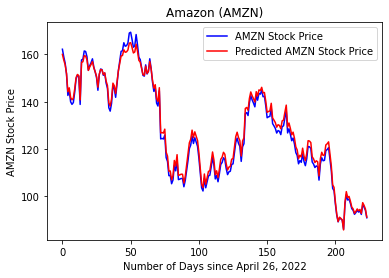

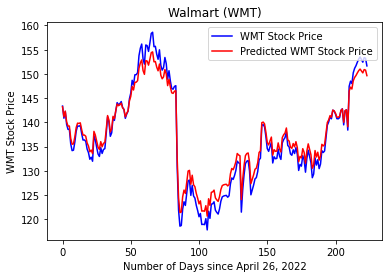

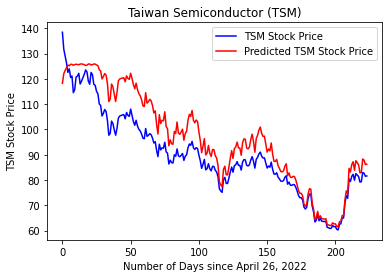

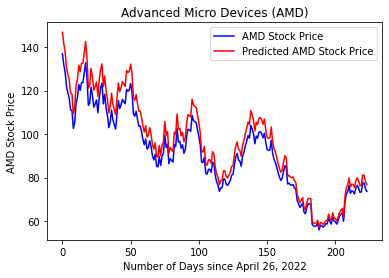

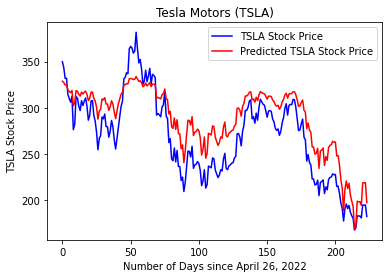

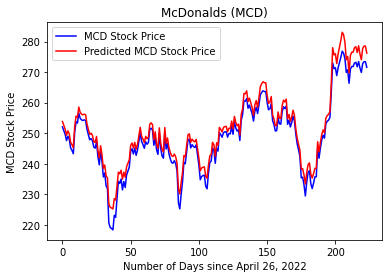

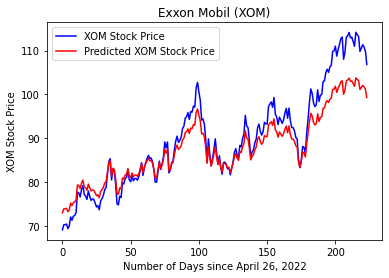

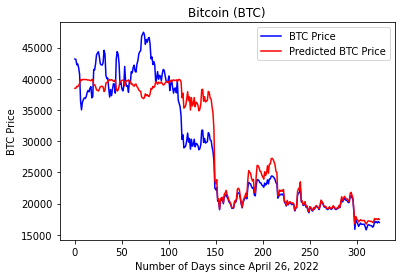

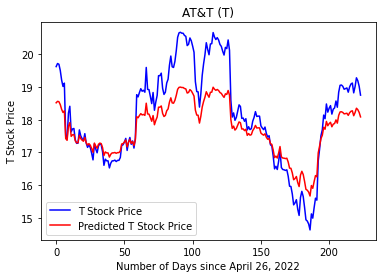

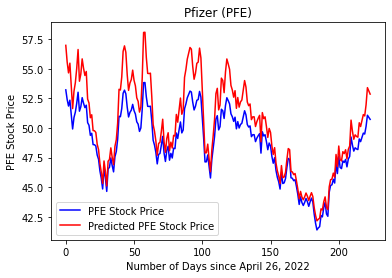

In [ ]:
# AMZN
plt.plot(amzn_values[training_split:], color = 'blue', label = 'AMZN Stock Price')
plt.plot(predict_amzn, color = 'red', label = 'Predicted AMZN Stock Price')
plt.title('Amazon (AMZN)')
plt.xlabel('Number of Days since April 26, 2022')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.show()

# WMT
plt.plot(wmt_values[training_split:], color = 'blue', label = 'WMT Stock Price')
plt.plot(predict_wmt, color = 'red', label = 'Predicted WMT Stock Price')
plt.title('Walmart (WMT)')
plt.xlabel('Number of Days since April 26, 2022')
plt.ylabel('WMT Stock Price')
plt.legend()
plt.show()

# TSM
plt.plot(tsm_values[training_split:], color = 'blue', label = 'TSM Stock Price')
plt.plot(predict_tsm, color = 'red', label = 'Predicted TSM Stock Price')
plt.title('Taiwan Semiconductor (TSM)')
plt.xlabel('Number of Days since April 26, 2022')
plt.ylabel('TSM Stock Price')
plt.legend()
plt.show()

# AMD
plt.plot(amd_values[training_split:], color = 'blue', label = 'AMD Stock Price')
plt.plot(predict_amd, color = 'red', label = 'Predicted AMD Stock Price')
plt.title('Advanced Micro Devices (AMD)')
plt.xlabel('Number of Days since April 26, 2022')
plt.ylabel('AMD Stock Price')
plt.legend()
plt.show()

# TSLA
plt.plot(tsla_values[training_split:], color = 'blue', label = 'TSLA Stock Price')
plt.plot(predict_tsla, color = 'red', label = 'Predicted TSLA Stock Price')
plt.title('Tesla Motors (TSLA)')
plt.xlabel('Number of Days since April 26, 2022')
plt.ylabel('TSLA Stock Price')
plt.legend()
plt.show()

# MCD
plt.plot(mcd_values[training_split:], color = 'blue', label = 'MCD Stock Price')
plt.plot(predict_mcd, color = 'red', label = 'Predicted MCD Stock Price')
plt.title('McDonalds (MCD)')
plt.xlabel('Number of Days since April 26, 2022')
plt.ylabel('MCD Stock Price')
plt.legend()
plt.show()

# XOM
plt.plot(xom_values[training_split:], color = 'blue', label = 'XOM Stock Price')
plt.plot(predict_xom, color = 'red', label = 'Predicted XOM Stock Price')
plt.title('Exxon Mobil (XOM)')
plt.xlabel('Number of Days since April 26, 2022')
plt.ylabel('XOM Stock Price')
plt.legend()
plt.show()

# BTC
plt.plot(btc_values[training_split_btc:], color = 'blue', label = 'BTC Price')
plt.plot(predict_btc, color = 'red', label = 'Predicted BTC Price')
plt.title('Bitcoin (BTC)')
plt.xlabel('Number of Days since April 26, 2022')
plt.ylabel('BTC Price')
plt.legend()
plt.show()

# T
plt.plot(t_values[training_split:], color = 'blue', label = 'T Stock Price')
plt.plot(predict_t, color = 'red', label = 'Predicted T Stock Price')
plt.title('AT&T (T)')
plt.xlabel('Number of Days since April 26, 2022')
plt.ylabel('T Stock Price')
plt.legend()
plt.show()

# PFE
plt.plot(pfe_values[training_split:], color = 'blue', label = 'PFE Stock Price')
plt.plot(predict_pfe, color = 'red', label = 'Predicted PFE Stock Price')
plt.title('Pfizer (PFE)')
plt.xlabel('Number of Days since April 26, 2022')
plt.ylabel('PFE Stock Price')
plt.legend()
plt.show()

# Evaluation
We use statistics to measure the accuracy and error of each model in this section.

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# Mean absolute percentage error
amzn_error = mean_absolute_percentage_error(amzn_values[training_split:], predict_amzn)
wmt_error = mean_absolute_percentage_error(wmt_values[training_split:], predict_wmt)
tsm_error = mean_absolute_percentage_error(tsm_values[training_split:], predict_tsm)
amd_error = mean_absolute_percentage_error(amd_values[training_split:], predict_amd)
tsla_error = mean_absolute_percentage_error(tsla_values[training_split:], predict_tsla)
mcd_error = mean_absolute_percentage_error(mcd_values[training_split:], predict_mcd)
pfe_error = mean_absolute_percentage_error(pfe_values[training_split:], predict_pfe)
xom_error = mean_absolute_percentage_error(xom_values[training_split:], predict_xom)
btc_error = mean_absolute_percentage_error(btc_values[training_split_btc:], predict_btc)
t_error = mean_absolute_percentage_error(t_values[training_split:], predict_t)

print("Mean Average Percentage Errors")
print("AMZN: " + str(amzn_error * 100) + "%")
print("WMT: " + str(wmt_error * 100) + "%")
print("TSM: " + str(tsm_error * 100) + "%")
print("AMD: " + str(amd_error * 100) + "%")
print("TSLA: " + str(tsla_error * 100) + "%")
print("MCD: " + str(mcd_error * 100) + "%")
print("PFE: " + str(pfe_error * 100) + "%")
print("XOM: " + str(xom_error * 100) + "%")
print("BTC: " + str(btc_error * 100) + "%")
print("T: " + str(t_error * 100) + "% \n")

# Root of Mean Square Errors
amzn_rmse = math.sqrt(mean_squared_error(amzn_values[training_split:], predict_amzn))
wmt_rmse = math.sqrt(mean_squared_error(wmt_values[training_split:], predict_wmt))
tsm_rmse = math.sqrt(mean_squared_error(tsm_values[training_split:], predict_tsm))
amd_rmse = math.sqrt(mean_squared_error(amd_values[training_split:], predict_amd))
tsla_rmse = math.sqrt(mean_squared_error(tsla_values[training_split:], predict_tsla))
mcd_rmse = math.sqrt(mean_squared_error(mcd_values[training_split:], predict_mcd))
pfe_rmse = math.sqrt(mean_squared_error(pfe_values[training_split:], predict_pfe))
xom_rmse = math.sqrt(mean_squared_error(xom_values[training_split:], predict_xom))
btc_rmse = math.sqrt(mean_squared_error(btc_values[training_split_btc:], predict_btc))
t_rmse = math.sqrt(mean_squared_error(amzn_values[training_split:], predict_amzn))

print("Root of Mean Square Errors")
print("AMZN: " + str(amzn_rmse))
print("WMT: " + str(wmt_rmse))
print("TSM: " + str(tsm_rmse))
print("AMD: " + str(amd_rmse))
print("TSLA: " + str(tsla_rmse))
print("MCD: " + str(mcd_rmse))
print("PFE: " + str(pfe_rmse))
print("XOM: " + str(xom_rmse))
print("BTC: " + str(btc_rmse))
print("T: " + str(t_rmse) + "\n")

amzn_day_count = 0
for day in range(len(predict_amzn)):
  if amzn_values[training_split + day] > amzn_values[training_split + day-1] and predict_amzn[day] > predict_amzn[day - 1]:
    amzn_day_count += 1
  elif amzn_values[training_split + day] < amzn_values[training_split + day-1] and predict_amzn[day] < predict_amzn[day - 1]:
    amzn_day_count += 1
  elif amzn_values[training_split + day] == amzn_values[training_split + day-1] and predict_amzn[day] == predict_amzn[day - 1]:
    amzn_day_count += 1

wmt_day_count = 0
for day in range(len(predict_wmt)):
  if wmt_values[training_split + day] > wmt_values[training_split + day-1] and predict_wmt[day] > predict_wmt[day - 1]:
    wmt_day_count += 1
  elif wmt_values[training_split + day] < wmt_values[training_split + day-1] and predict_wmt[day] < predict_wmt[day - 1]:
    wmt_day_count += 1
  elif wmt_values[training_split + day] == wmt_values[training_split + day-1] and predict_wmt[day] == predict_wmt[day - 1]:
    wmt_day_count += 1

tsm_day_count = 0
for day in range(len(predict_tsm)):
  if tsm_values[training_split + day] > tsm_values[training_split + day-1] and predict_tsm[day] > predict_tsm[day - 1]:
    tsm_day_count += 1
  elif tsm_values[training_split + day] < tsm_values[training_split + day-1] and predict_tsm[day] < predict_tsm[day - 1]:
    tsm_day_count += 1
  elif tsm_values[training_split + day] == tsm_values[training_split + day-1] and predict_tsm[day] == predict_tsm[day - 1]:
    tsm_day_count += 1

amd_day_count = 0
for day in range(len(predict_amd)):
  if amd_values[training_split + day] > amd_values[training_split + day-1] and predict_amd[day] > predict_amd[day - 1]:
    amd_day_count += 1
  elif amd_values[training_split + day] < amd_values[training_split + day-1] and predict_amd[day] < predict_amd[day - 1]:
    amd_day_count += 1
  elif amd_values[training_split + day] == amd_values[training_split + day-1] and predict_amd[day] == predict_amd[day - 1]:
    amd_day_count += 1

tsla_day_count = 0
for day in range(len(predict_tsla)):
  if tsla_values[training_split + day] > tsla_values[training_split + day-1] and predict_tsla[day] > predict_tsla[day - 1]:
    tsla_day_count += 1
  elif tsla_values[training_split + day] < tsla_values[training_split + day-1] and predict_tsla[day] < predict_tsla[day - 1]:
    tsla_day_count += 1
  elif tsla_values[training_split + day] == tsla_values[training_split + day-1] and predict_tsla[day] == predict_tsla[day - 1]:
    tsla_day_count += 1

mcd_day_count = 0
for day in range(len(predict_mcd)):
  if mcd_values[training_split + day] > mcd_values[training_split + day-1] and predict_mcd[day] > predict_mcd[day - 1]:
    mcd_day_count += 1
  elif mcd_values[training_split + day] < mcd_values[training_split + day-1] and predict_mcd[day] < predict_mcd[day - 1]:
    mcd_day_count += 1
  elif mcd_values[training_split + day] == mcd_values[training_split + day-1] and predict_mcd[day] == predict_mcd[day - 1]:
    mcd_day_count += 1

pfe_day_count = 0
for day in range(len(predict_pfe)):
  if pfe_values[training_split + day] > pfe_values[training_split + day-1] and predict_pfe[day] > predict_pfe[day - 1]:
    pfe_day_count += 1
  elif pfe_values[training_split + day] < pfe_values[training_split + day-1] and predict_pfe[day] < predict_pfe[day - 1]:
    pfe_day_count += 1
  elif pfe_values[training_split + day] == pfe_values[training_split + day-1] and predict_pfe[day] == predict_pfe[day - 1]:
    pfe_day_count += 1

xom_day_count = 0
for day in range(len(predict_xom)):
  if xom_values[training_split + day] > xom_values[training_split + day-1] and predict_xom[day] > predict_xom[day - 1]:
    xom_day_count += 1
  elif xom_values[training_split + day] < xom_values[training_split + day-1] and predict_xom[day] < predict_xom[day - 1]:
    xom_day_count += 1
  elif xom_values[training_split + day] == xom_values[training_split + day-1] and predict_xom[day] == predict_xom[day - 1]:
    xom_day_count += 1

btc_day_count = 0
for day in range(len(predict_btc)):
  if btc_values[training_split_btc + day] > btc_values[training_split_btc + day-1] and predict_btc[day] > predict_btc[day - 1]:
    btc_day_count += 1
  elif btc_values[training_split_btc + day] < btc_values[training_split_btc + day-1] and predict_btc[day] < predict_btc[day - 1]:
    btc_day_count += 1
  elif btc_values[training_split_btc + day] == btc_values[training_split_btc + day-1] and predict_btc[day] == predict_btc[day - 1]:
    btc_day_count += 1

t_day_count = 0
for day in range(len(predict_t)):
  if t_values[training_split + day] > t_values[training_split + day-1] and predict_t[day] > predict_t[day - 1]:
    t_day_count += 1
  elif t_values[training_split + day] < t_values[training_split + day-1] and predict_t[day] < predict_t[day - 1]:
    t_day_count += 1
  elif t_values[training_split + day] == t_values[training_split + day-1] and predict_t[day] == predict_t[day - 1]:
    t_day_count += 1

print("Percentage of days with correct predicted direction of stock")
print("AMZN: " + str(amzn_day_count/len(predict_amzn) * 100) + "%")
print("WMT: " + str(wmt_day_count/len(predict_wmt) * 100) + "%")
print("TSM: " + str(tsm_day_count/len(predict_tsm) * 100) + "%")
print("AMD: " + str(amd_day_count/len(predict_amd) * 100) + "%")
print("TSLA: " + str(tsla_day_count/len(predict_tsla) * 100) + "%")
print("MCD: " + str(mcd_day_count/len(predict_mcd) * 100) + "%")
print("PFE: " + str(pfe_day_count/len(predict_pfe) * 100) + "%")
print("XOM: " + str(xom_day_count/len(predict_xom) * 100) + "%")
print("BTC: " + str(btc_day_count/len(predict_btc) * 100) + "%")
print("T: " + str(t_day_count/len(predict_t) * 100) + "%")

Mean Average Percentage Errors
AMZN: 1.3717129078692976%
WMT: 1.1527775383689212%
TSM: 7.632754279423142%
AMD: 5.446826241913079%
TSLA: 9.297670460815054%
MCD: 1.043236774624117%
PFE: 3.117746706026959%
XOM: 3.1221397070293073%
BTC: 6.536296699254911%
T: 3.346042460073426% 

Root of Mean Square Errors
AMZN: 1.9082642382343704
WMT: 1.7760402318500337
TSM: 8.467481154714257
AMD: 5.692001706215791
TSLA: 25.60430761272115
MCD: 2.8524832825083273
PFE: 1.8399560587596986
XOM: 4.10453024327103
BTC: 3286.5533840073813
T: 1.9082642382343704

Percentage of days with correct predicted direction of stock
AMZN: 100.0%
WMT: 100.0%
TSM: 91.96428571428571%
AMD: 100.0%
TSLA: 100.0%
MCD: 100.0%
PFE: 99.55357142857143%
XOM: 99.55357142857143%
BTC: 67.07692307692308%
T: 100.0%
